In [1]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]])
X

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       [0, 1, 1]])

In [3]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit(X).get_support()

array([False,  True,  True], dtype=bool)

In [4]:
X = pd.read_csv('./data/data.csv')
y = X.pop('Choroba')

In [5]:
sel = SelectKBest(chi2, 4).fit(X, y)

In [6]:
sup = sel.get_support()
sup

array([False, False, False, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False], dtype=bool)

In [7]:
X.columns[sup]

Index(['Czynniki przynoszące ulgę', 'Czas trwania bólu',
       'Charakter bólu obecnie', 'Nudności i wymioty'],
      dtype='object')

In [8]:
sel.scores_

array([   6.19547128,   21.22799637,   31.42958277,   70.86528634,
         18.4382007 ,   59.35724089,   87.45330315,   30.50175108,
         84.27295879,   32.12725245,  127.81125522,   84.63277926,
         54.48919861,   42.18394863,   12.32214117,    4.46955607,
          0.58959993,    7.0073467 ,   15.55416849,   15.92964405,
         20.20244884,   17.70819375,   58.15203816,   31.19179501,
          8.77101719,   77.455673  ,   21.38740081,   13.06216932,
         11.40595049,    8.50409159,   13.66563792])

In [9]:
sel.get_support()

array([False, False, False, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False], dtype=bool)

In [10]:
for i,j,k in zip(sel.scores_, sel.pvalues_, sel.get_support()):
    print(f'{i:>10.6f} {j:>10.15f} {k == (i>33) == (j<1e-5)} {k}')

  6.195471 0.517119801937809 True False
 21.227996 0.003446959859385 True False
 31.429583 0.000051795239439 True False
 70.865286 0.000000000000988 False False
 18.438201 0.010141848130921 True False
 59.357241 0.000000000202827 False False
 87.453303 0.000000000000000 True True
 30.501751 0.000076802954257 True False
 84.272959 0.000000000000002 True True
 32.127252 0.000038467877593 True False
127.811255 0.000000000000000 True True
 84.632779 0.000000000000002 True True
 54.489199 0.000000001881978 False False
 42.183949 0.000000479260681 False False
 12.322141 0.090450463142984 True False
  4.469556 0.724380069308140 True False
  0.589600 0.999047804928296 True False
  7.007347 0.428115322361901 True False
 15.554168 0.029516733168178 True False
 15.929644 0.025766973304113 True False
 20.202449 0.005148602698994 True False
 17.708194 0.013358284699728 True False
 58.152038 0.000000000352638 False False
 31.191795 0.000057308241480 True False
  8.771017 0.269516880247803 True False

In [11]:
a, b = chi2(X, y)
a, b

(array([   6.19547128,   21.22799637,   31.42958277,   70.86528634,
          18.4382007 ,   59.35724089,   87.45330315,   30.50175108,
          84.27295879,   32.12725245,  127.81125522,   84.63277926,
          54.48919861,   42.18394863,   12.32214117,    4.46955607,
           0.58959993,    7.0073467 ,   15.55416849,   15.92964405,
          20.20244884,   17.70819375,   58.15203816,   31.19179501,
           8.77101719,   77.455673  ,   21.38740081,   13.06216932,
          11.40595049,    8.50409159,   13.66563792]),
 array([  5.17119802e-01,   3.44695986e-03,   5.17952394e-05,
          9.87569478e-13,   1.01418481e-02,   2.02827025e-10,
          4.12103331e-16,   7.68029543e-05,   1.84644247e-15,
          3.84678776e-05,   1.80078754e-24,   1.55853650e-15,
          1.88197793e-09,   4.79260681e-07,   9.04504631e-02,
          7.24380069e-01,   9.99047805e-01,   4.28115322e-01,
          2.95167332e-02,   2.57669733e-02,   5.14860270e-03,
          1.33582847e-02,   3.52637

In [12]:
a.shape, b.shape, X.shape, y.shape

((31,), (31,), (476, 31), (476,))

In [13]:
aa = a > 33
aa

array([False, False, False,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False], dtype=bool)

In [14]:
bb = b < 1e-5
bb

array([False, False, False,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False], dtype=bool)

In [15]:
np.array_equal(aa, bb)

True

In [16]:
sel = SelectKBest(chi2, 4).fit(X, y)
sup = sel.get_support()
X.columns[sup].values.tolist()

['Czynniki przynoszące ulgę',
 'Czas trwania bólu',
 'Charakter bólu obecnie',
 'Nudności i wymioty']

In [17]:
X = X.drop(X.columns[~sup], axis=1)
X.head()

,Czynniki przynoszące ulgę,Czas trwania bólu,Charakter bólu obecnie,Nudności i wymioty
0,2,3,2,3
1,1,3,3,3
2,2,4,3,3
3,1,2,3,3
4,3,3,2,3


In [18]:
X['Choroba'] = y
X.shape

(476, 5)

In [19]:
scores, _ = chi2(X, y)
scores

array([  87.45330315,   84.27295879,  127.81125522,   84.63277926,
        727.26396917])

In [20]:
mask = np.zeros_like(scores, dtype=bool)
mask

array([False, False, False, False, False], dtype=bool)

In [21]:
np.argsort(scores)

array([1, 3, 0, 2, 4])

In [22]:
np.argsort(scores)[-4:]

array([3, 0, 2, 4])

In [23]:
mask[np.argsort(scores)[-4:]] = 1
mask

array([ True, False,  True,  True,  True], dtype=bool)

In [24]:
from scipy.stats import chi2

In [25]:
v = chi2(X, y)
v

In [26]:
v = y.values
v

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6,

In [39]:
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
v

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6,

(0.62605042016806722,
 array([ 141.,   17.,   29.,   28.,   55.,   32.,  157.,   17.]),
 298.0)

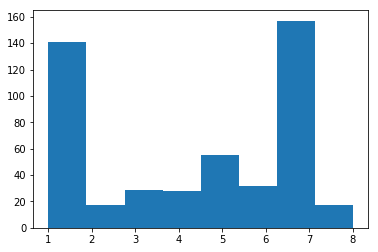

In [38]:
h = plt.hist(v, bins=8)
(h[0][0] + h[0][6]) / sum(h[0]), h[0], h[0][0] + h[0][6]

In [41]:
y.values- 1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5,

In [47]:
X = pd.read_csv('./data/data.csv')
y = X.pop('Choroba')

X

,Płeć,Wiek,Lokalizacja bólu na początku zachorowania,Lokalizacja bólu obecnie,Intensywność bólu,Czynniki nasilające ból,Czynniki przynoszące ulgę,Progresja bólu,Czas trwania bólu,Charakter bólu na początku zachorowania,...,Temperatura (pacha),Tętno,Ruchy oddechowe powłok brzusznych,Wzdęcia,Umiejscowienie bolesności uciskowej,Objaw Blumberga,Obrona mięśniowa,Wzmożone napięcie powłok brzusznych,Opory patologiczne,Objaw Murphy'ego
0,2,5,7,7,1,3,2,1,3,2,...,4,5,2,2,8,2,1,2,2,1
1,2,5,4,1,3,3,1,2,3,2,...,4,7,2,1,3,2,1,1,2,1
2,2,3,4,5,2,3,2,3,4,2,...,4,4,1,2,2,1,2,1,1,1
3,2,5,7,2,1,3,1,2,2,2,...,4,7,2,1,11,2,2,2,1,1
4,2,3,4,11,2,3,3,2,3,1,...,4,4,1,2,6,2,1,2,2,2
5,2,5,4,7,3,3,3,2,1,1,...,4,5,2,1,11,2,2,1,2,2
6,1,1,7,11,2,2,2,2,4,2,...,4,6,2,1,2,2,2,1,2,1
7,2,1,4,8,2,3,2,1,3,2,...,2,1,1,2,7,2,2,2,2,1
8,1,3,10,1,2,3,2,2,3,2,...,4,2,2,1,3,2,1,2,1,1
9,2,3,4,5,3,4,1,3,1,2,...,1,8,2,1,9,1,2,2,2,1


$
\chi ^ 2 = \sum_{i=1}^{n}{{(O_i - E_i) ^ 2} \over {E_i}}
$

 $\sum_{n=1}^{\infty} 2^{-n} = 1$